In [1]:
!pip install --upgrade --editable gym-env

Obtaining file:///C:/Users/Lenovo/Desktop/archi/ForagingReplenishingPatches-main/gym-env
  Running setup.py develop for gym-env


You should consider upgrading via the 'c:\users\lenovo\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
import gym
import gym_env
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

env = gym.make('foraging-replenishing-patches-v0')

env.reset()
for i in range(300):
    action = np.random.randint(9)
    state, reward, done, _ = env.step(action)
    print(action, state, reward, done)
    if done:
        break

0 0 0 False
1 1 0 False
1 1 0 False
4 4 0 False
1 1 0 False
1 1 0 False
0 0 0 False
4 4 0 False
3 3 0 False
3 3 0 False
4 4 0 False
5 5 0 False
4 4 0 False
2 2 0 False
7 7 0 False
5 5 0 False
0 0 0 False
3 3 0 False
0 0 0 False
1 1 0 False
6 6 0 False
6 6 0 False
0 0 0 False
8 0 0 False
6 6 0 False
3 3 0 False
0 0 0 False
6 6 0 False
8 6 63.0 False
7 7 63.0 False
1 1 63.0 False
0 0 63.0 False
8 0 63.0 False
1 1 63.0 False
5 5 63.0 False
0 0 63.0 False
7 7 63.0 False
3 3 63.0 False
2 2 63.0 False
0 0 63.0 False
3 3 63.0 False
8 3 63.0 False
5 5 63.0 False
8 5 63.0 False
6 6 63.0 False
8 6 119.7 False
1 1 119.7 False
7 7 119.7 False
3 3 119.7 False
2 2 119.7 False
1 1 119.7 False
2 2 119.7 False
3 3 119.7 False
6 6 119.7 False
7 7 119.7 False
1 1 119.7 False
7 7 119.7 False
4 4 119.7 False
8 4 189.9 False
8 4 252.9 False
4 4 252.9 False
7 7 252.9 False
0 0 252.9 False
6 6 252.9 False
4 4 252.9 False
2 2 252.9 False
2 2 252.9 False
2 2 252.9 False
5 5 252.9 False
5 5 252.9 False
2 2 252.9

In [10]:
def decEpsGreedy(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, forgetDecay=0.5):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))

      if np.random.rand(1) < eps:
        a = np.random.randint(env.action_space.n-1)
      else:
        a = np.random.choice(np.flatnonzero(np.isclose(Q, np.max(Q))))
      s, r, terminal, info = env.step(a)
      s, r, terminal, info = env.step(8)
      N[a] += 1
      Q[a] += (r-reward-Q[a])/N[a]
      Q *= (1-forgetDecay)
      Q[a] /= (1-forgetDecay)
      reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [12]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = decEpsGreedy(env=genv, maxEpisodes=50, eps_start=1, eps_end=0.1, decayType='exponential', decayTill=10)
print(rs)

[3973.5000000000005, 6635.699999999998, 8838.9, 7605.899999999999, 10740.599999999997, 11122.200000000004, 14941.800000000007, 11906.999999999993, 13948.2, 14851.800000000008, 15183.899999999998, 14409.899999999996, 13463.1, 14571.900000000001, 17335.79999999999, 15339.6, 17045.09999999999, 14543.099999999999, 15988.500000000004, 14620.499999999998, 12095.099999999999, 12061.800000000003, 15947.099999999993, 12729.599999999999, 13042.8, 13986.9, 11918.700000000003, 12805.199999999999, 13278.599999999995, 15381.9, 15040.800000000001, 14367.600000000002, 14422.5, 16014.600000000004, 13700.699999999995, 15089.400000000009, 13320.9, 14000.399999999996, 16023.599999999993, 13971.600000000002, 14688.900000000003, 14284.8, 13354.200000000006, 13019.399999999998, 12046.500000000004, 16543.8, 15404.400000000005, 14694.299999999996, 13906.799999999996, 16993.800000000007]


100%|██████████| 3/3 [00:53<00:00, 17.74s/it]


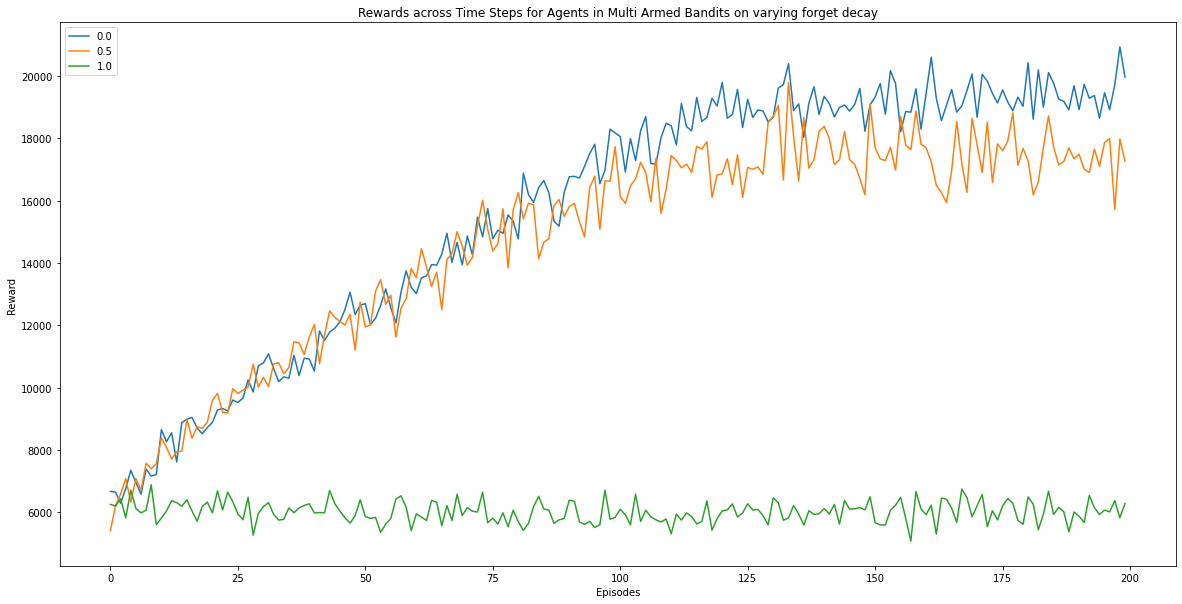

In [22]:
for i in tqdm(range(0,11,5)):
  RS = []
  for _ in range(5):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = decEpsGreedy(env=genv, maxEpisodes=200, eps_start=1, eps_end=0.1, decayType='exponential', maxTime=300, decayTill=125, forgetDecay=i/10)
    RS.append(rs)
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title("Rewards across Time Steps for Agents in Multi Armed Bandits on varying forget decay")
  plt.xlabel('Episodes')
  plt.ylabel('Reward') 
  plt.plot(np.arange(200), np.mean(RS,axis=0), label=str(i/10))
  plt.legend()

plt.show()

Suggestions

1. decay factor as a function of time
2. decay Q for patches not on currently which were last visited for some tau value
3. recency effect (initial patches have had more time to be recorded, for last patches more recency)
    a. knows current patch
    b. forgets patches not visited for a while

4. Working Memory

5. Long Term Working Memory
    a. identify non rewarding patches this has lower decay factor because lesser information needed to store 
    b. but decay memory of rewarding patches with a greater decay factor because more information needed to store

6. Distance Heuristics
    a. reward = reward + reward_distance
    b. opportunity cost of patch foraging paper, eq3

7. MDP Approaches

8. Marginal Value Theorem
    a. Can't use directly because revisiting allowed in our game
    b. One way for global average: (total reward in env) / (total time so far)
    c. Local Reward: (total patch reward) / (total time so far in that patch)
        i. this matters in patch leaving
        ii. determines policy for patch leaving (test for this)
    d. Varies temporally
    e. Include travel time in MVT

    

In [20]:
def sarsa(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, gamma = 0.9, alpha = 0.5):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    s=env.current_state
    while env.time_elapsed < maxTime:
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))
      if np.random.rand(1) < eps:
        ns = np.random.randint(env.action_space.n-1)
      else:
        ns = np.random.choice(np.flatnonzero(np.isclose(Q, np.max(Q))))
      _, r, terminal, info = env.step(s)
      _, r, terminal, info = env.step(8)
      target = r - reward
      if not terminal : target = target + gamma*Q[ns]
      error = target - Q[s]
      Q[s] = Q[s]+alpha*error
      s=ns
      #Q *= (1-forgetDecay)
      #Q[a] /= (1-forgetDecay)
      reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [21]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = sarsa(env=genv, maxEpisodes=50, eps_start=1, eps_end=0.1, decayType='linear', decayTill=25)
print(rs)

[3724.1999999999994, 5156.099999999999, 4735.799999999999, 5475.599999999999, 5236.2, 5279.400000000002, 6489.9000000000015, 6212.7, 7767.9, 6321.600000000002, 6741.9000000000015, 8231.400000000003, 7888.5, 7883.999999999999, 7422.299999999999, 7270.200000000001, 9604.800000000001, 9923.400000000003, 9136.800000000003, 9760.500000000002, 10658.7, 11431.799999999997, 11947.500000000004, 11665.800000000005, 12417.300000000003, 12870.899999999998, 12860.1, 12403.800000000003, 12446.100000000002, 12208.499999999993, 14006.699999999995, 14620.5, 13975.200000000003, 14440.500000000004, 13370.4, 12106.799999999996, 13124.699999999997, 11225.700000000004, 13409.100000000004, 12131.100000000006, 13443.299999999994, 12789.899999999996, 14414.399999999994, 12878.099999999993, 14262.299999999997, 13303.800000000008, 12275.100000000002, 10926.900000000001, 11725.199999999999, 10104.300000000005]


No handles with labels found to put in legend.


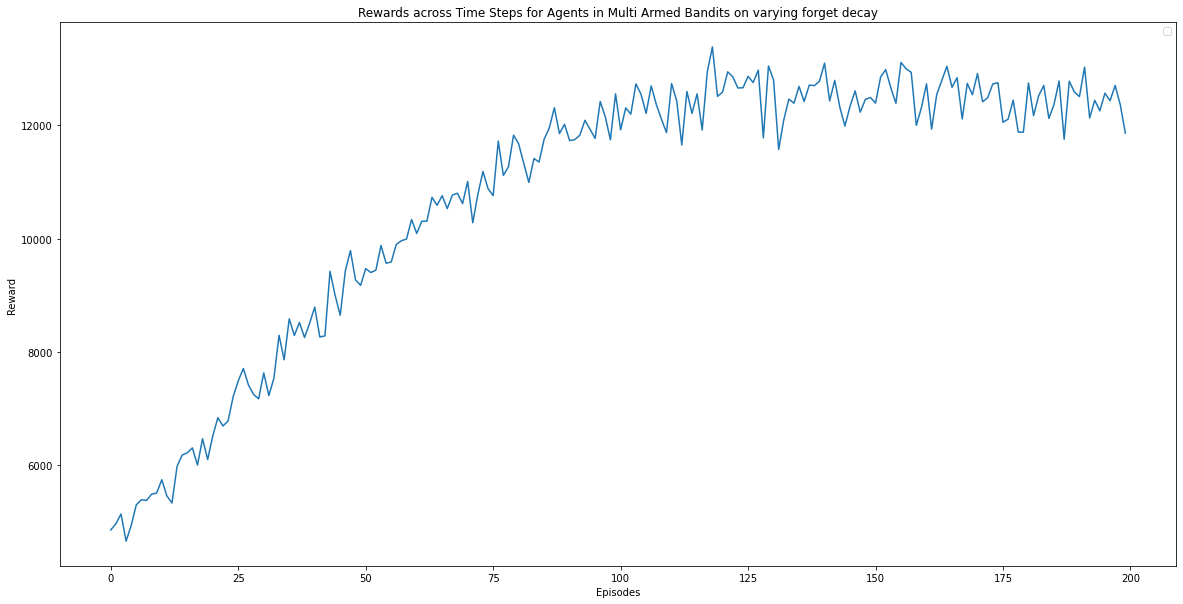

In [38]:

RS = []
for _ in range(10):
    genv = gym.make('foraging-replenishing-patches-v0')
    genv.reset()
    _,rs = sarsa(env=genv, maxEpisodes=200, eps_start=1, eps_end=0.1, decayType='exponential', maxTime=300, decayTill=125)
    RS.append(rs)
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Rewards across Time Steps for Agents in Multi Armed Bandits on varying forget decay")
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(200), np.mean(RS,axis=0))
plt.legend()

plt.show()

In [27]:
def sarsa_lda(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, gamma = 0.9, alpha = 0.5, lda=0.5):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  E = np.zeros(env.action_space.n-1)
    
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    s=env.current_state
    while env.time_elapsed < maxTime:
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))
      if np.random.rand(1) < eps:
        ns = np.random.randint(env.action_space.n-1)
      else:
        ns = np.random.choice(np.flatnonzero(np.isclose(Q, np.max(Q))))
      _, r, terminal, info = env.step(s)
      _, r, terminal, info = env.step(8)
      target = r - reward
      if not terminal : target = target + gamma*Q[ns]
      error = target - Q[s]
      E[s] +=1 
      Q = Q + alpha*error*E
      E=gamma*lda*E
      s=ns
      #Q *= (1-forgetDecay)
      #Q[a] /= (1-forgetDecay)
      reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:41<00:00, 33.91s/it]


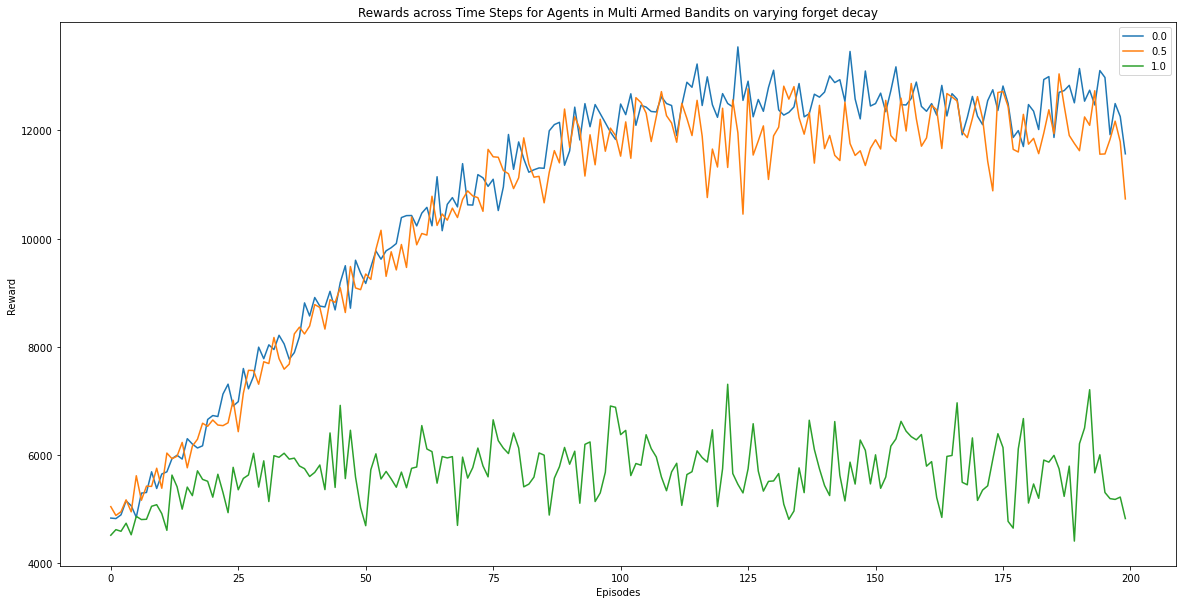

In [30]:
for i in tqdm(range(0,11,5)):
  RS = []
  for _ in range(10):
    genv = gym.make('foraging-replenishing-patches-v0')
    genv.reset()
    _,rs = sarsa_lda(env=genv, maxEpisodes=200, eps_start=1, eps_end=0.1, decayType='exponential', maxTime=300, decayTill=125, lda=i/10)
    RS.append(rs)
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title("Rewards across Time Steps for Agents in Multi Armed Bandits on varying forget decay")
  plt.xlabel('Episodes')
  plt.ylabel('Reward') 
  plt.plot(np.arange(200), np.mean(RS,axis=0), label=str(i/10))
  plt.legend()

plt.show()


In [35]:
def forgetfull_sarsa(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, gamma = 0.9, alpha = 0.5, forgetDecay=0.1):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  E = np.zeros(env.action_space.n-1)
    
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    s=env.current_state
    while env.time_elapsed < maxTime:
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))
      if np.random.rand(1) < eps:
        ns = np.random.randint(env.action_space.n-1)
      else:
        ns = np.random.choice(np.flatnonzero(np.isclose(Q, np.max(Q))))
      _, r, terminal, info = env.step(s)
      _, r, terminal, info = env.step(8)
      target = r - reward
      if not terminal : target = target + gamma*Q[ns]
      error = target - Q[s]
      Q = Q + alpha*error
      Q *= (1-forgetDecay)
      Q[s] /= (1-forgetDecay)
      s=ns
      reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:09<00:00, 23.18s/it]


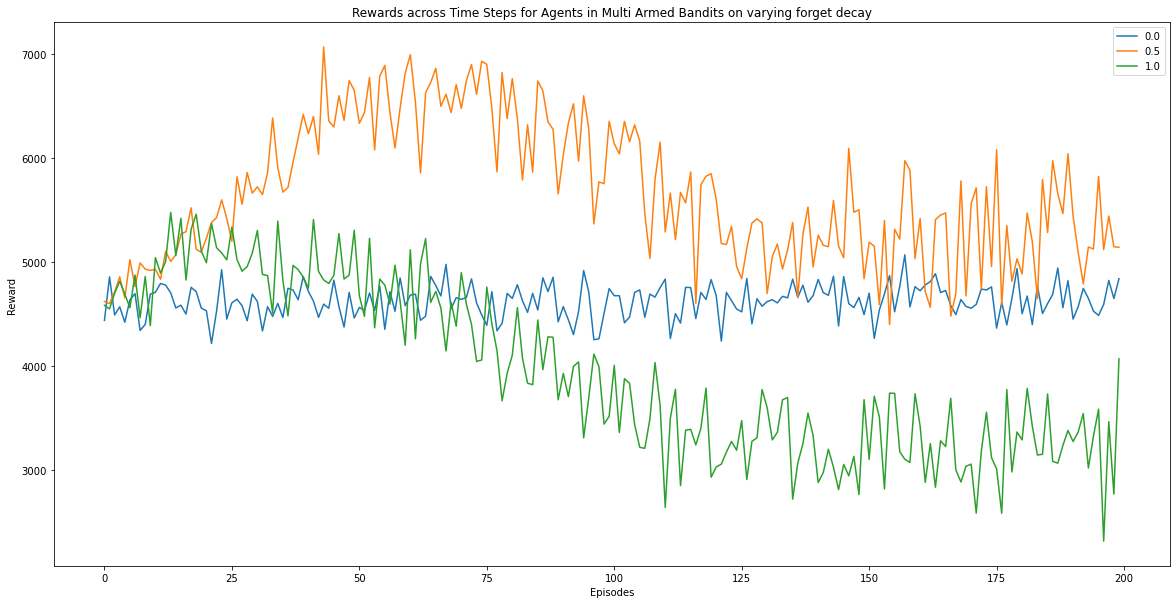

In [37]:
for i in tqdm(range(0,11,5)):
  RS = []
  for _ in range(10):
    genv = gym.make('foraging-replenishing-patches-v0')
    genv.reset()
    _,rs = forgetfull_sarsa(env=genv, maxEpisodes=200, eps_start=1, eps_end=0.1, decayType='exponential', maxTime=300, decayTill=125, forgetDecay=i/11)
    RS.append(rs)
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title("Rewards across Time Steps for Agents in Multi Armed Bandits on varying forget decay")
  plt.xlabel('Episodes')
  plt.ylabel('Reward') 
  plt.plot(np.arange(200), np.mean(RS,axis=0), label=str(i/10))
  plt.legend()

plt.show()

In [44]:
def forgetDecay_sarsa(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, gamma = 0.9, alpha = 0.5, forgetfullness = 0.1, forgetDecay=0.1):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  E = np.zeros(env.action_space.n-1)
  f = forgetfullness
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    s=env.current_state
    while env.time_elapsed < maxTime:
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))
      if np.random.rand(1) < eps:
        ns = np.random.randint(env.action_space.n-1)
      else:
        ns = np.random.choice(np.flatnonzero(np.isclose(Q, np.max(Q))))
      _, r, terminal, info = env.step(s)
      _, r, terminal, info = env.step(8)
      target = r - reward
      if not terminal : target = target + gamma*Q[ns]
      error = target - Q[s]
      Q = Q + alpha*error
      Q *= (1-f)
      Q[s] /= (1-f)
      s=ns
      reward = r
    rewards.append(reward)
    Q_est[i] = Q
    f=f*forgetDecay
  return Q_est, rewards

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:35<00:00, 31.99s/it]


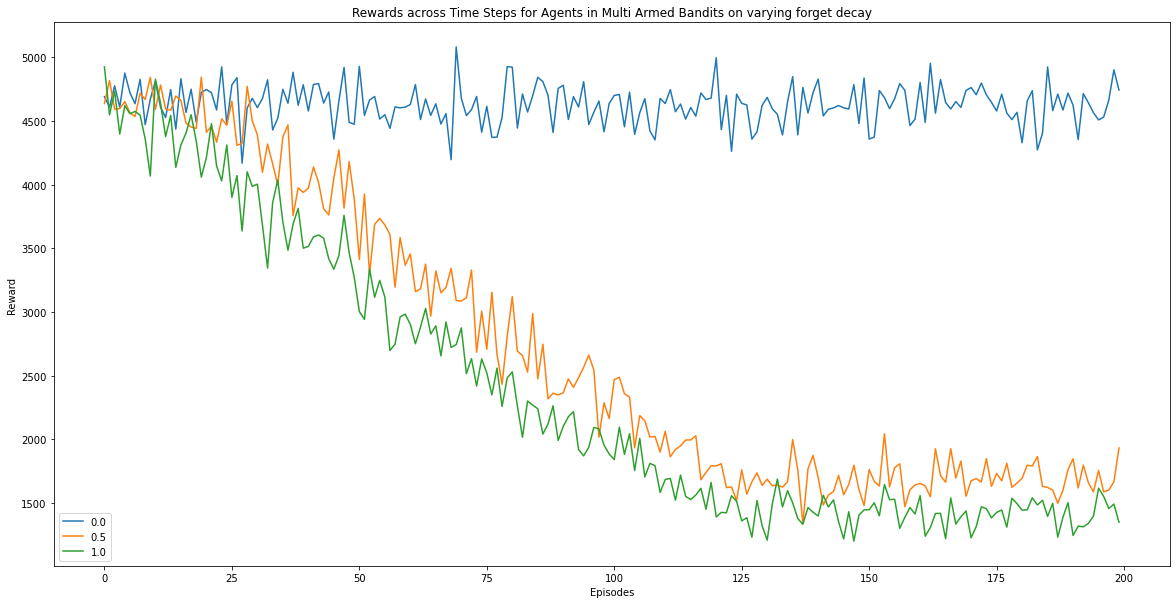

In [45]:
for i in tqdm(range(0,11,5)):
  RS = []
  for _ in range(10):
    genv = gym.make('foraging-replenishing-patches-v0')
    genv.reset()
    _,rs = forgetDecay_sarsa(env=genv, maxEpisodes=200, eps_start=1, eps_end=0.1, decayType='exponential', maxTime=300, decayTill=125, forgetfullness=i/11)
    RS.append(rs)
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title("Rewards across Time Steps for Agents in Multi Armed Bandits on varying forget decay")
  plt.xlabel('Episodes')
  plt.ylabel('Reward') 
  plt.plot(np.arange(200), np.mean(RS,axis=0), label=str(i/10))
  plt.legend()

plt.show()